# Foundations of Data Science
## S1 Week 02: Pandas - Data Wrangling

**Learning outcomes:** 
In this lab you will learn to prepare your data for future use. By the end of the lab you should be able to:
- get an overview of your data,
- clean data, and
- combine data from multiple datasets.

After analysing the survival rate of different passenger groups on the titanic last week, now imagine you are a political advisor for the UN this week. You will analyse data from the World Health Organization (WHO), in order to answer the following question:

**Research question:** Which medical, social and economic factors have the biggest impact on life expectancy, and which improvement would have the biggest impact on the three countries with the shortest life expectancy?

**Data description:** The data from the first [dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who) for this lab originates from the Global Health Observatory (GHO) data repository under the WHO. It contains health factors, as well as social and economic data of 193 countries between 2000 and 2015. The dataset was slightly preprocessed for this lab. The [second dataset](https://data.world/fivethirtyeight/alcohol-consumption) is based on data from an article in 'Fivethirtyeight', a website that focuses on political and economic articles and polls. It contains information about the alcohol consumption in 193 countries.

**Remarks**
- Starting from this lab, we will not provide all the code, but expect you to be able to draw from previous labs to fill in the code.
- Try not to use copy+paste when coding these labs, as typing will help you memorize the code better.
- Try to understand each detail in the code we provide, and read the comments!
- In the text `df` refers to a generic pandas DataFrame, which allows us to indicate which methods are applied to DataFrames. E.g. in `df.head()`, the  `head` is a member function of a pandas DataFrame.
- Finally, try to keep a **clean structure** when programming: As discussed in the previous lab, we will start by loading all libraries we need at the top of the lab.

**Pair programming:** We encourage you to work in pairs again. Remember that the magic command you need to get the link for the session with your partner is:

In [ ]:
!echo "https://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )"

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

We can now start by loading the data we will use in this lab.

**Exercise 01:** 

a) Load the `life_expectancy.csv` file which is in `datasets`, and store the variable as `life_expectancy`. 

b) Print the first few entries of the dataset.

In [4]:
# Your code
life_expectancy = pd.read_csv('./datasets/life_expectancy.csv')
life_expectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In the last lab you learned to load data, and get an overview of the data using `df.head()`. Now, we will look at higher level information of the data. Whenever you work with data, it is important to get a good idea of how your data looks like:
- **Nature of data:** Is the data from a population (e.g. medical data from patients) or rather high-level statistics (e.g. economic data comparison of different countries)?
- **Data format:** Is the dataset a relational database, if so what columns does it have?
- **Missing data:** Is the data complete (e.g. does every row contain an entry in every column, or are some entries missing)?
- **Consistent data:** Is the notation used consistent throughout the database (e.g. Nan vs None vs Null vs __ vs 0 vs -1 ...)?

All those points and many more should be answered before you start running any algorithms on your data. **Clean data is key!**

## 2.A Data exploration: High level information of DataFrames

In Exercise 01 you printed out the first few entries and also the column names. These entries might give you an idea of what type of entries you should expect in a specific columns. For example, in the column 'Total expenditure', which reflects the total general government expenditure on health, you should only expect numbers. However, this might not always be the case and the data might be stored in a different format from what you would expect. Columns with numbers could be floats, integers or even strings, e.g. 0 vs 0.0 vs 'Zero' vs 'NIL' vs '0'.

**Exercise 02:** Use filtering to get all the entries for 'Zimbabwe'.

In [8]:
# Your code
life_expectancy.query("Country == 'Zimbabwe'")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2922,Zimbabwe,2015,Developing,67.0,336.0,22,0.000000,87.0,0,31.8,...,88.0,No data,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,10.822595,91.0,0,31.3,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,10.666707,95.0,0,3.8,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,92.602336,97.0,0,3.3,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,63.750530,94.0,0,29.9,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,53.308581,9.0,9696,29.4,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,1.040021,73.0,853,29.0,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,20.843429,75.0,0,28.6,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,29.814566,72.0,242,28.2,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,34.262169,68.0,212,27.9,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


 As you can see it contains a string 'No data' in the 'Total expenditure' column. If we print out the entry below, which looks like a float (6.44), we realize something unexpected:

In [9]:
life_expectancy.iloc[2923]['Total expenditure']

'6.44'

It's printed out as '6.44' instead of 6.44. This is because pandas expects all entries in a specific column to be of the same type. Thus, when pandas loads the table from a csv file and finds an entry that clearly isn't a numeric value ('No data'), it casts all other entries in the same column to a string.

To be certain of **what types are used** we can use `df.info()`.

In [10]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

**Remark** The 'Total expenditure' column has `dtype:object`, but the entries we printed out above looked like strings. To understand why pandas stores strings as objects, read this answer on [stackoverflow](https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object/21020411). **Stackoverflow** is an extremely helpful website for most questions you will encounter when coding!

To get an **overview of the numerical data** you have in your dataset `.describe()` is a good option. It gives you the most important statistical analysis of your columns with numerical data.

In [11]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Have a look at the output of `df.describe()`.

**Discussion 01:** Discuss with your lab partner what the `count` row represents. Check  the correct answer on stackoverflow or the official pandas documentation. How is this information helpful when analyzing your dataset? Use stackoverflow or the official documentation to work out how you could compute just one of the statistics for one specific column, e.g. how can we compute the mean of the 'BMI' column? Write down your answers:

In [18]:
life_expectancy.BMI.mean()

38.321246556473824

Your answer:
The count row represents the number of non-NA cells of each column. This is the same as the .count() function in the pandas library.


'Total expenditure' is not listed in the statistical analysis, which is because, as mentioned above, all values were cast to a string when loaded. This is very annoying, as most values are actually numeric, and the statistical measures of the numeric values, such as the median, are still meaningful, even though not all values are numeric. To compute these values, we will have to clean up the data first. As mentioned above: **Clean data is key!**

## 2.B Cleaning data

### 2.B.1 Detecting non-numerical values

A common problem in datasets is that data are not consistently of the same type. For example, a date is written in a non-standard way or a number is given as a string instead of a numeric value. Many data analysis algorithms are applied to numeric data. So let's tackle the problem we encountered above in the 'Total expenditure' column.

To help us ensure that every entry in a column is numeric, pandas offers the function `pd.to_numeric(series, errors={‘ignore’, ‘raise’, ‘coerce’}, downcast = {‘integer’, ‘signed’, ‘unsigned’, ‘float’})`.

This function does three things:
1. it checks whether every entry is a numeric value
2. if a non-numeric value is encountered (error), either it is ignored, raised (see below) or replaced by a NaN value (`error = 'coerce'`)
3. if `downcast` is chosen (default is `None`), it casts all numeric values down to the specified parameter. 

**Remark:** If the chosen `dtype` occupies more bits  than the `dtype` of the value (e.g. chosen `dtype` is `float`, but the found value is `int`) `pd.to_numeric` doesn't recast the value!

In [19]:
life_expectancy['Total expenditure'] = pd.to_numeric(life_expectancy['Total expenditure'], 
                                                    errors = 'coerce')
life_expectancy['Total expenditure']

0       8.16
1       8.18
2       8.13
3       8.52
4       7.87
        ... 
2933    7.13
2934    6.52
2935    6.53
2936    6.16
2937    7.10
Name: Total expenditure, Length: 2938, dtype: float64

**Remark** `pd.numeric` creates a copy and does not apply the changes directly to the series, hence the need to save the changes as shown above. If you just want to check whether or not all values are numeric, you can call `pd.to_numeric(life_expectancy['Total expenditure'], errors='raise')`, which will raise errors but not save any changes.

Why is it interesting to have NaN values instead of strings, such as 'No data'? Let's check the type.

In [20]:
type(np.NaN)

float

It's a float, which means that you can apply all numeric operations to entire columns; NaN values are usually just ignored. Now we can compute the missing values from our statistical analysis above.

**Exercise 03:**

a) Start by saving the values from the 'Total expenditure' column in a new variable `total_expenditure`. What type does `total_expenditure` have? (Try to think of the answer first, then check with `type()`.)

b) Compute the eight values (count, mean, ...) using the methods you should have learned about in **Discussion 01**.

In [22]:
# Your code
total_expenditure = life_expectancy['Total expenditure'] # will be a Series
type(total_expenditure)

pandas.core.series.Series

**Remark:** By default, when loading a csv file in pandas, empty values are usually filled with *NaN values automatically*.

However, even NaN values can be annoying. Where do you plot a value with x-coordinate 1 and y-coordinate NaN? There are different options for how to deal with NaN values.

First, let's start by checking which values are NaN, using `.isna()`, which is a mask (we have discussed masks in lab01). It returns the same data structure as the one it is applied to, with `True` and `False` values instead of the values from the original data structure.

In [23]:
print('Series:\n')
print(life_expectancy['Life expectancy'].isna())
print('\n\nDataFrames:\n')
print(life_expectancy.isna())

Series:

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Life expectancy, Length: 2938, dtype: bool


DataFrames:

      Country   Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0       False  False   False            False            False          False   
1       False  False   False            False            False          False   
2       False  False   False            False            False          False   
3       False  False   False            False            False          False   
4       False  False   False            False            False          False   
...       ...    ...     ...              ...              ...            ...   
2933    False  False   False            False            False          False   
2934    False  False   False            False            False          False   
2935    False  False   False            Fals

It looks like there are no NaN in the 'Life expectancy' column. Let's double check, by summing all the values of each column. (Remember that False == 0, and True == 1).

In [31]:
# life_expectancy['Life expectancy'].isna()
life_expectancy[life_expectancy['Life expectancy'].isna()].index.to_list()

[624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713]

It turns out that there are a few missing values, but none of them are at the beginning or the end, so we didn't see them. This is an **important lesson**: using `.head()` gives you a good initial idea of how the data looks like, but it is by no means comprehensive!

### 2.B.2 Working with NaN values

#### Dropping NaN values

Now we know how to find NaN values, let's fix those values. We have a couple of options. First, if you just want to get rid of data entries with NaN values, you can drop them using `.dropna(axis={0 or'index', 1 or'columns}, how={‘any’, ‘all’}, thresh=N, subset=[col1, col2, ...])`.

In [32]:
life_expectancy.dropna(axis = 0, how = 'any') # drops rows if any value is a NaN

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Because we specified `how='any'`, pandas drops a row if *any* column has a NaN value, so  the DataFrame is reduced to 1649 rows from 2938 rows initially. However, we wanted to discuss more ways of handling NaN values, and now we have dropped them. The good news is that  `dropna()` creates a copy, as usual with pandas DataFrame methods, and the original DataFrame is preserved. If you do want to apply those changes, you can use either `df = df.dropna(axis = 0, how = 'any')` or `df.dropna(axis = 0, how = 'any', inplace = True)`. `inplace=True` can be used in many DataFrame methods to apply the operations to the DataFrame.

Now that we know that we didn't apply the changes to the DataFrame, let's discuss some more options for dealing with NaNs.

Instead of `how = 'any'`, you can choose `'all'`, which drops rows only if *all* values are NaN. You can specify `axis=1`, to look along columns for NaN values and drop columns instead of rows. You can further set `subset=[col1, col2]` to search specific columns or rows for NaN values, and finally you can set a `thresh=N` to specify that at least `N` values need to be **non-NaN** to be kept. Give it a try!

**Exercise 03:** Drop columns with more than 20% NaN values. Save the result to a new DataFrame and print that DataFrame.

In [47]:
# Your code
life_expectancy.dropna(axis=1, how='any', thresh=int(
    life_expectancy.shape[0] * 0.8))



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


You should have got the original DataFrame without the 'Population' column.

#### Overwriting NaN values
If you don't want to drop your data entries you can replace the values. You have many options, including: 
- The mean, max or min value of the column
- strings
- 0

The function needed is `df.fillna(value={scalar, dict}, method={‘bfill’, ‘ffill’}, axis={0, 1}, limit=N)`.

In [48]:
life_expectancy.fillna(0).loc[2922] # Get row 2922 of the DataFrame where NaN values are replaced with 0.

Country                              Zimbabwe
Year                                     2015
Status                             Developing
Life expectancy                          67.0
Adult Mortality                         336.0
infant deaths                              22
percentage expenditure                    0.0
Hepatitis B                              87.0
Measles                                     0
BMI                                      31.8
under-five deaths                          32
Polio                                    88.0
Total expenditure                         0.0
Diphtheria                               87.0
HIV/AIDS                                  6.2
GDP                                 118.69383
Population                         15777451.0
thinness 1-19 years                       5.6
thinness 5-9 years                        5.5
Income composition of resources         0.507
Schooling                                10.3
Name: 2922, dtype: object

Above we have applied two operations at once to the DataFrame. It shows the row we initially inspected where 'Total expenditure' = 'No data'. Now it is 0.

**Remark:** In some cases, it makes more sense to replace different NaN values according to the column they are in. You can do this by passing a dictionary instead of a scalar. `df.fillna(value={'col1': value1, 'col2': value2})`. For more information on `fillna()` you are invited to check the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

We will only be interested by entries with no NaN values for the rest of this lab, so we will drop all entries with NaN values:

In [49]:
life_expectancy.dropna(subset=['Life expectancy'], inplace=True)

## 2.C Unique values

So far, we have loaded the data, we have extracted some high-level information about the data set, and dealt with missing data entries. These steps are important initial steps that need to be taken whenever you deal with data, especially data you haven't generated yourself.

Another important step is to check whether your data is free of duplicate observations. Let's check how many unique values we have in each column of the DataFrame.

In [50]:
life_expectancy.nunique()

Country                             183
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
percentage expenditure             2323
Hepatitis B                          87
Measles                             958
BMI                                 602
under-five deaths                   252
Polio                                73
Total expenditure                   816
Diphtheria                           81
HIV/AIDS                            200
GDP                                2485
Population                         2277
thinness 1-19 years                 200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

We see that, for example, in 'Status', we only have two unique values. Let's check which ones they are.

In [51]:
pd.unique(life_expectancy['Status'])

array(['Developing', 'Developed'], dtype=object)

**Remark:** `df.nunique()` is applied to the data structure (Series or DataFrames), whereas `pd.unique()` takes the data structure as a parameter.

The above query showed us that there are two categories in the 'Status' column: Developing and Developed. Let's find out the impact of whether a country is considered to be developing or developed.

**Exercise 04:** 

a) Split the dataset into two subsets with the names 'developed' and 'developing' according to the status of the countries.

b) Compute the mean life expectancy of each subset.

In [59]:
# Your code
developed_countries = life_expectancy[life_expectancy['Status'] == 'Developed']
developing_countries = life_expectancy.query("Status == 'Developing'")
print('Mean life expectancy for developing countries developing_countries: %f' % developing_countries['Life expectancy'].mean())
print('Mean life expectancy for developed countries: %f' % developed_countries['Life expectancy'].mean())


Mean life expectancy for developing countries developing_countries: 67.111465
Mean life expectancy for developed countries: 79.197852


**Discussion:** Is the difference of life expectancy between the two groups about what you expected? If not what statistical metric could help you understand why the life expectancy difference is not what you expected? If you can think of a specific metric, compute that metric and see whether this confirms your expectations. Write down your answers:

Your answer:


In [ ]:
# Your code

We have found the unique values, but `pd.unique` searches unique values in each column. To search for entire rows of data that duplicate other rows, we need to use `df.duplicated(subset=[col1, col2, ...], keep={'first', 'last', False})`. This function is a mask; by now you should know how to use masks. It returns a Series with `True` and `False` entries, where `True` marks the rows that are duplicates of another row. The subset parameter allows you to specify which columns to consider when checking for duplicates. This can be very helpful when you have a column of unique identifiers, and you want to know if there are rows that are identical apart from the unique identifier. For example, different patients (with different IDs = unique identifier) might have the same symptoms. The `keep` parameter lets you specify which occurrence of a duplicate to mark as `False` (i.e. not as a duplicate): 
- `'first'`, which is the default value, marks the first occurrence as not a duplicate, but all other occurrences as duplicates of the first occurrence, 
- `'last'` marks the last occurrence as not a duplicate, but all other occurrences as duplicates of the last occurrence, and
- `False` marks all occurrences of duplicates as duplicates.

Let's give it a try:

In [68]:
life_expectancy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2928, dtype: bool

As promised above, `.duplicated()` gives you a mask. It looks like no entry is a duplicate. Let's check.

In [69]:
life_expectancy.duplicated().sum()

0

(Remember, `False==0`, `True==1`; thus summing the series tells you how many `True` entries there were in the Series). The above tells you that there are no duplicates. Thankfully the WHO, as we would hope, created a clean dataset.

Let's check whether there are countries in which the life expectancy remained the same over the years.

In [70]:
life_expectancy.duplicated(subset=['Country', 'Life expectancy']).sum()

234

There are 136 instances in which the life expectancy did not change. Let's print them.

**Exercise 05:** 
- Print *all* occurrences of duplicates. Hint: think about the keep parameter.
- Print all the countries that appear in the list. Each country should only appear once.
- Create a new DataFrame from the `life_expectancy` DataFrame, with the name `cleaned_life_expectancy`, in which  each country only appears once. Since the entries are sorted newest to oldest, only keep the newest observation of each country. Print out the first few lines to check your DataFrame looks as expected. 

**Hint:** to negate a condition in Pandas, use the tilde `~` operator instead of `not`, e.g.: if `people` is a DataFrame with a column `adult` of boolean values: `child = people[~people['adult']]`.

In [84]:
# Your code
duplicates = life_expectancy[life_expectancy.duplicated(keep=False, subset=['Country', 'Life expectancy'])].head()
print(duplicates.head(2))
pd.unique(duplicates['Country'])

cleaned_life_expectancy = life_expectancy.drop_duplicates(keep='first', subset=['Country'])
# life_expectancy[~ life_expectancy.duplicated(keep='first', subset=['Country'])]

       Country  Year      Status  Life expectancy  Adult Mortality  \
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   infant deaths  percentage expenditure  Hepatitis B  Measles   BMI  ...  \
1             64               73.523582         62.0      492  18.6  ...   
2             66               73.219243         64.0      430  18.1  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   

   Schooling  
1       10.0  
2        9.9  

[2 rows x 21 columns]


We have finished cleaning our dataset. Let's plot some of the results. You can ignore the code below; we will learn about plotting in the next two labs and this is just to give you an idea of your data.

In [85]:
cleaned_life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


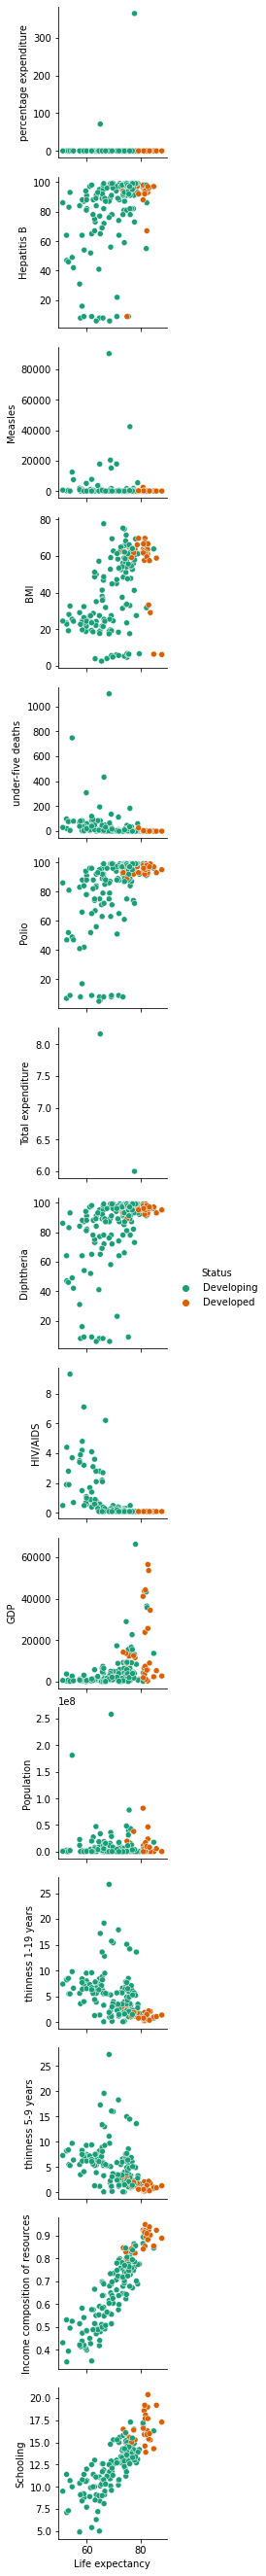

In [86]:
sns.pairplot(cleaned_life_expectancy, x_vars = ['Life expectancy'], y_vars = ['percentage expenditure', 'Hepatitis B', 'Measles',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'], hue='Status', palette='Dark2')

**Discussion:** Discuss with your lab partner which factors seem to have a clear correlation with life expectancy.

Your answer:


Up to now, we have used single datasets and analyzed them. The WHO dataset contains medical and economic factors, and the plot above showed whether or not there was a correlation between those factors and life expectancy. 

Now suppose that a politician approaches you who is interested in whether limiting alcohol consumption might have a positive effect on life expectancy. To analyze this you need to use a second dataset.

In [87]:
drinks_by_country_loc = os.path.join(os.getcwd(), 'datasets', 'drinks_by_country.csv')
drinks_by_country = pd.read_csv(drinks_by_country_loc)
drinks_by_country.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Pure Alcohol,Continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


## 2.D Combining data from two datasets

You will rarely find all the information you need in one dataset. Being able to combine data from different datasets into one is very important. Practise it until you feel very comfortable; having just tried it once is not enough. 

There a various ways of combining data from datasets: *concatenation*, *merging* and *joining*.

### Concatenation

Let's start with the arguably simplest pandas function: `concat`

When you concatenate two *data structures*, pandas DataFrames or pandas series, you simply append one to the other along one axis (along rows or along columns), i.e. you expect that the new data is "independent" of the existing data. 

Let's illustrate that on a simple toy example.

In [88]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[0, 1, 2, 3])

print(df1)
print('\n\n')
print(df2)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3



    A   B   C   D
0  A4  B4  C4  D4
1  A5  B5  C5  D5
2  A6  B6  C6  D6
3  A7  B7  C7  D7


In [89]:
result = pd.concat([df1, df2])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


**Remarks:** 
- Both DataFrames had entries with indices 0-3. However, using `concat` means that there is no relational connection between the rows, and thus `df2` is just appended to `df1`.
- `pd.concat()` takes as input a list of data structures and can concatenate several DataFrames at once.

As mentioned above, we can specify along which axis the data structures should be concatenated. The default is `axis=0`, as above. We hinted above that `concat` and `join` have two different meanings. In fact, `join={'inner', 'outer'}` is a parameter allowing you to specify the set logic of how data entries that only exist in one set but not the other should be treated. Using *inner* join means that you only want the intersection, while *outer* join means you want to keep the union. Sounds a bit abstract? Let's try it out.

In [92]:
df3 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df4 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7']},
                    index=[0, 1, 2, 3])

print(df3)
print('\n\n')
print(df4)

result = pd.concat([df3, df4], axis=0, join='outer')
result

    A   B   D
0  A0  B0  D0
1  A1  B1  D1
2  A2  B2  D2
3  A3  B3  D3



    A   B   C
0  A4  B4  C4
1  A5  B5  C5
2  A6  B6  C6
3  A7  B7  C7


,A,B,D,C
0,A0,B0,D0,NaN
1,A1,B1,D1,NaN
2,A2,B2,D2,NaN
3,A3,B3,D3,NaN
0,A4,B4,NaN,C4
1,A5,B5,NaN,C5
2,A6,B6,NaN,C6
3,A7,B7,NaN,C7


In the example above along `axis=0`, one dataset has the columns 'A', 'B', and 'D', while the other has the columns 'A', 'B', and 'C'. Because we specified `join='outer'` it took the *union* of the two column sets, i.e. 'A', 'B', 'C', and 'D' and just filled out the missing information with `NaN` values. What would happen in the case of `join='inner'`? Give it a try. Is it what you would expect?

In [94]:
# Your code
result_inner = pd.concat([df3, df4], join='inner')
result_inner

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


Above we have seen, that indices 0-3 were repeated, because we just appended one dataset to the other and didn't assume any relation. However, in that case the indices most probably don't even have a meaning, and could be ignored. This can be achieved with, who could have guessed, `ignore_index=True`.

In [95]:
result = pd.concat([df1, df2], ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### Merging

What can we do, when we have a relation between two datasets? For example, in both the life expectancy dataset and the alcohol consumption dataset, we have the column 'Country'. Combining both datasets by comparing those columns and combining the corresponding data entries would be very helpful.

Let's consider a toy example again.

In [96]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                     'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']})

right = pd.DataFrame({'key': ['K1', 'K0', 'K3'],
                      'C': ['C0', 'C1', 'C3'],
                      'D': ['D0', 'D1', 'D3']})
print(left)
print('\n\n')
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2



  key   C   D
0  K1  C0  D0
1  K0  C1  D1
2  K3  C3  D3


In [97]:
result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C1,D1
1,K1,A1,B1,C0,D0


With `on='column'` we specify the column the two datasets will be compared on.

**Remarks**
- In contrast to `pd.concat()`, `pd.merge()` only takes two DataFrames as input (left and right)
- `pd.merge()` compares the rows across all data entries. For example, in the 'right' dataset the data entry 'K0' is in the second row though in the left data set it is in the first row.
- As you can see above, by default, `pd.merge()` uses an inner join.
- The column specified by the keyword 'on' needs to be *written the same way* in both datasets.

With `pd.concat()` the 'join' parameter specifies an inner join and an outer join. With `pd.merge()` we have the same option, only the keyword is `how={'inner', 'outer', 'left', 'right'}`, with the two extra options `left` and `right`. Technically `left` stands for 'left outer join', and means that:
- we keep all rows that appear in the left dataset
- merge the matching rows from the right dataset into the left dataset
- drop all rows that only appear in the right dataset.

Let's try it out.

In [ ]:
result = pd.merge(left, right, on='key', how='left')
result

'K0', 'K1', and 'K2' are kept, as they all appear in the `left` dataset. However, 'K3', which only appears in the right dataset is dropped.

**Note on performance**: By default, `merge` will sort the output based on the values in the key column in lexicographic order, which can affect the performance substantially, if you do not care about the order, you can set `sort=False`.

There are a couple of more parameters you can set, in both `concat` and `merge`. However, the above are the most important. If you are interested, check out the [pandas website](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

**Exercise 06:** Use either `pd.merge` or `pd.concat` to combine the two datasets(`cleaned_life_expectancy`, `drinks_by_country`) so we can relate drinks consumption to life expectancy. We don't want to have unnecessary NaN values, so only keep the entries that are found in both datasets. Save the result to `final_life_expectancy`.

In [100]:
# Your code
final_life_expectancy = pd.merge(cleaned_life_expectancy, drinks_by_country, how='left', on='Country')

Again, ignore the code below. Just run it and compare the impact of different drinks on life expectancy.

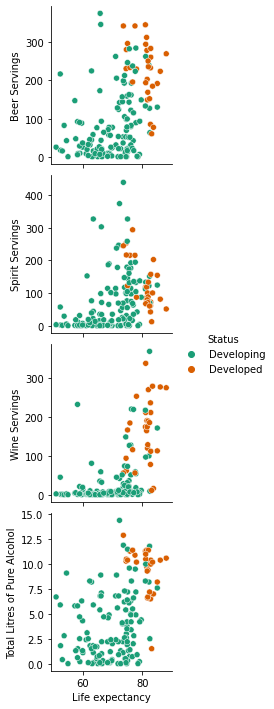

In [101]:
sns.pairplot(final_life_expectancy, x_vars = ['Life expectancy'], y_vars = ['Beer Servings', 'Spirit Servings', 'Wine Servings', 'Total Litres of Pure Alcohol'], hue='Status', palette='Dark2')

**Discussion:** 
- Does the data above suggest that alcohol consumption as an average for a population has an impact on life expectancy?
- Find the three countries with the lowest life expectancy from `final_life_expectancy`.
- Have a look at the plots above, and discuss with your lab partner: Can we pinpoint the short life expectancy to specific factors? What changes would help those countries probably most to improve their life expectancy.

In [ ]:
# Your code


Your answer: 
Although wine seems to show a positive relationship between wine consumption and life expectancy, we think that that is more likely due to wine being seen as more of a refined drink, and as it's more expensive, it's more indicative of the money that 'developed' countries can afford to spend on entertainment and fine dining, which in turn could indicate more money to spend on healthcare. Therefore there is correlation between drinking more wine and living longer, but there is no correlation.

**We need your help:** This is a new course. In order for us to improve the labs for the next iterations, and to make sure that the next labs are better, we need your feedback. Please fill out the following [form](https://forms.office.com/Pages/ResponsePage.aspx?id=sAafLmkWiUWHiRCgaTTcYZmGMCx4KxlMjSTITqjdcXpUMU84RUdSVU1XMlc4TVBKRlozTkdRN1I5Mi4u).